<a href="https://colab.research.google.com/github/shivi13102/Supernova-Dectection/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# Load normalized dataset
df = pd.read_csv("supernova_features_normalized.csv")

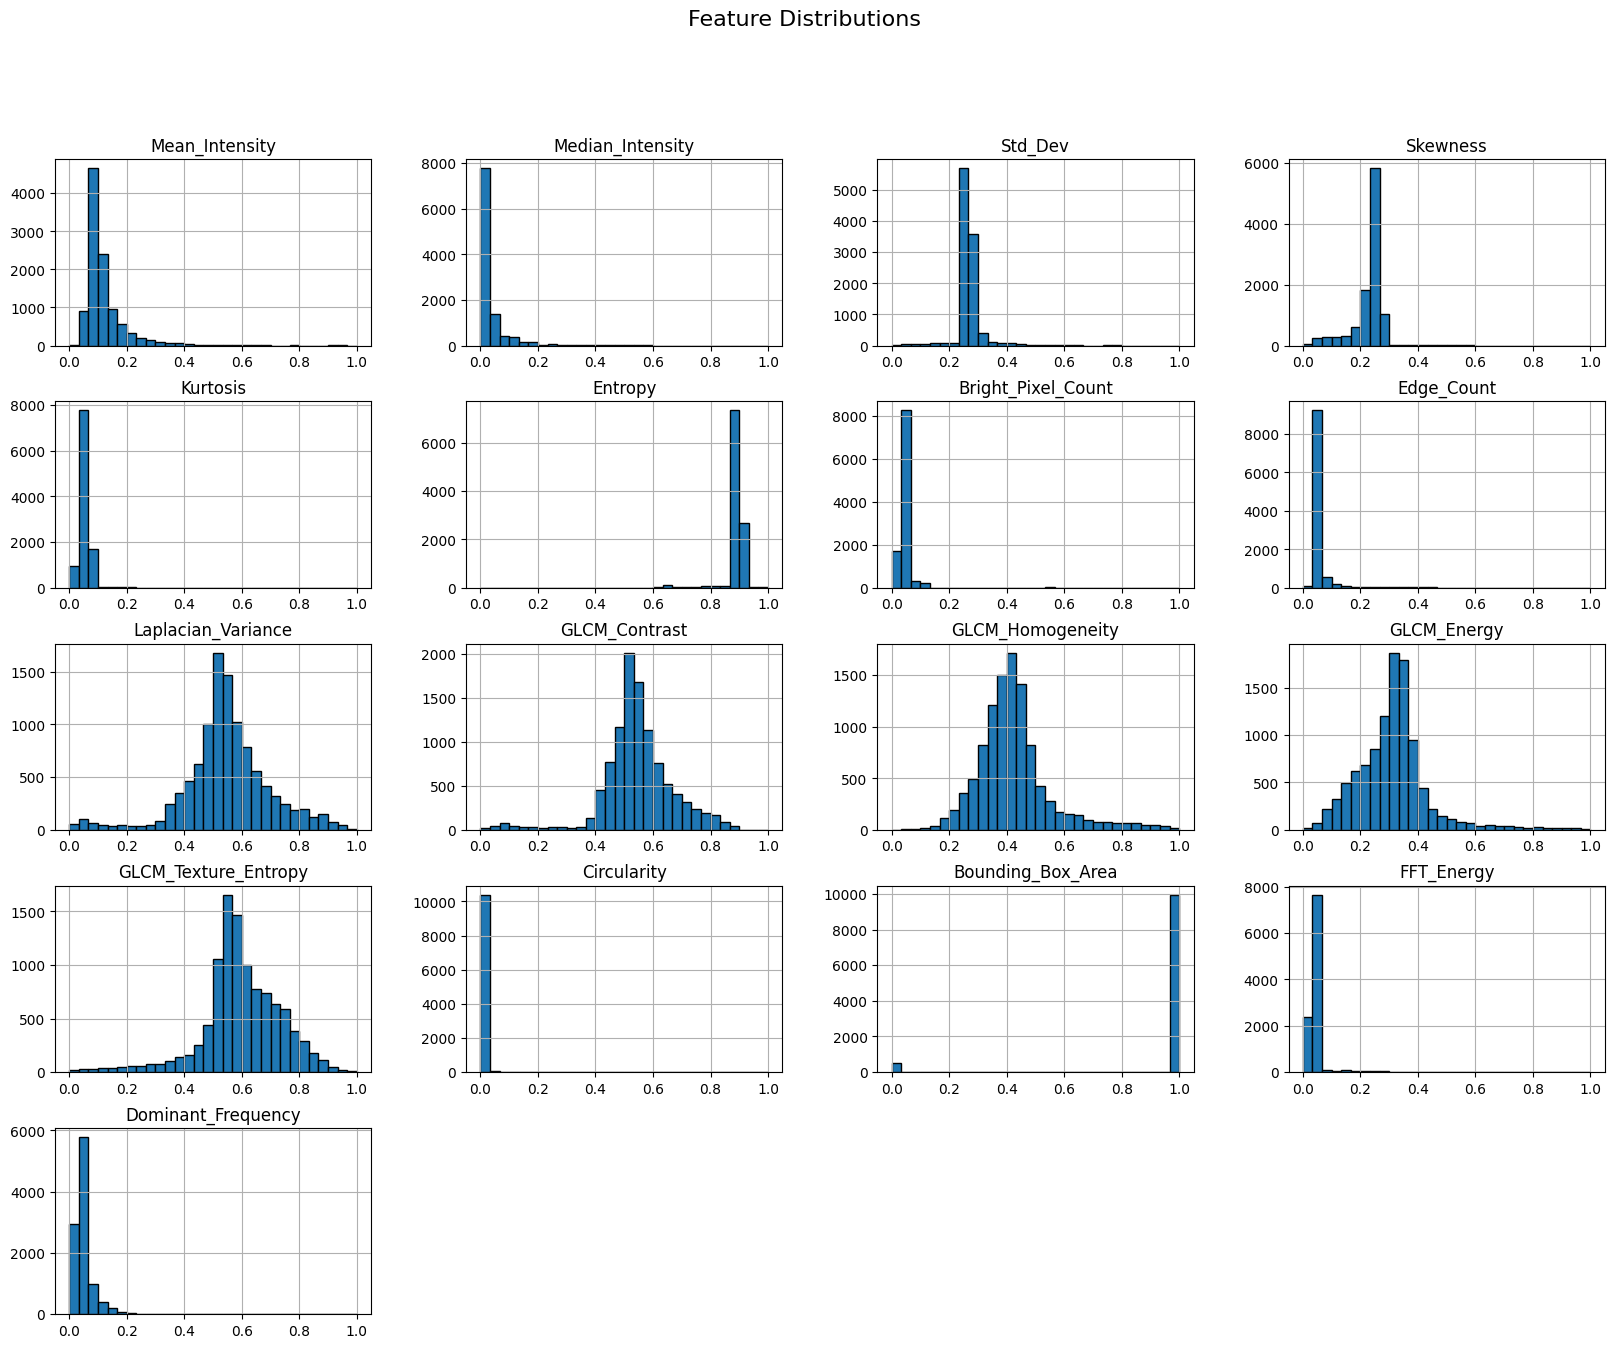

In [6]:
# Exclude 'Image_Path' column
df_numeric = df.iloc[:, 1:]

# Plot histograms
df_numeric.hist(figsize=(20, 15), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

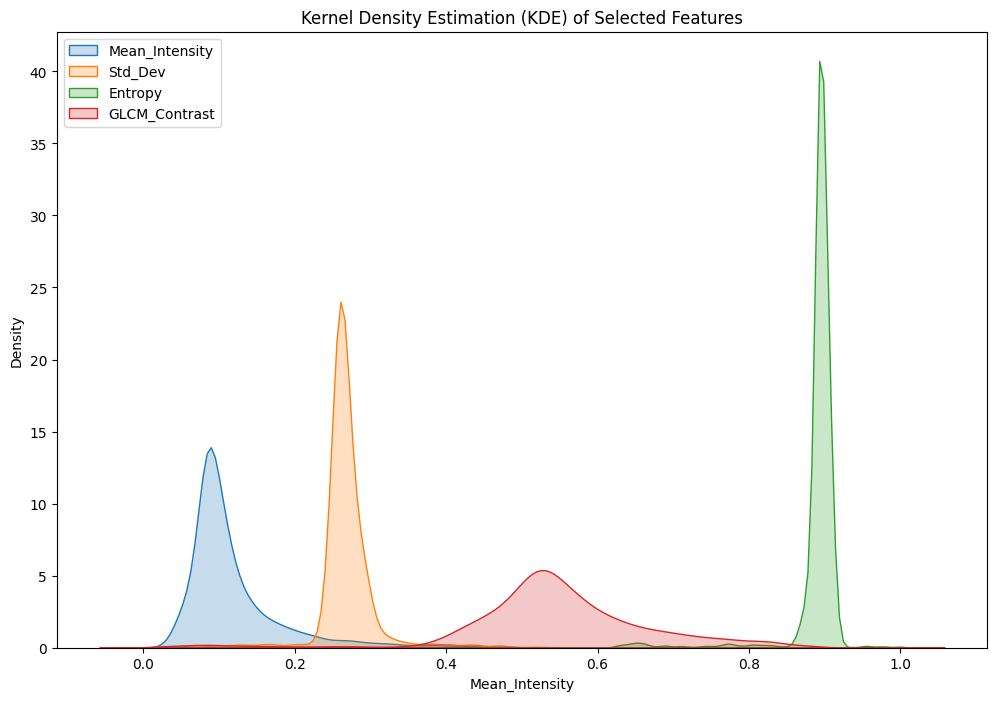

In [7]:
# KDE Plots for selected features
selected_features = ["Mean_Intensity", "Std_Dev", "Entropy", "GLCM_Contrast"]
plt.figure(figsize=(12, 8))

for feature in selected_features:
    sns.kdeplot(df[feature], label=feature, fill=True)

plt.title("Kernel Density Estimation (KDE) of Selected Features")
plt.legend()
plt.show()

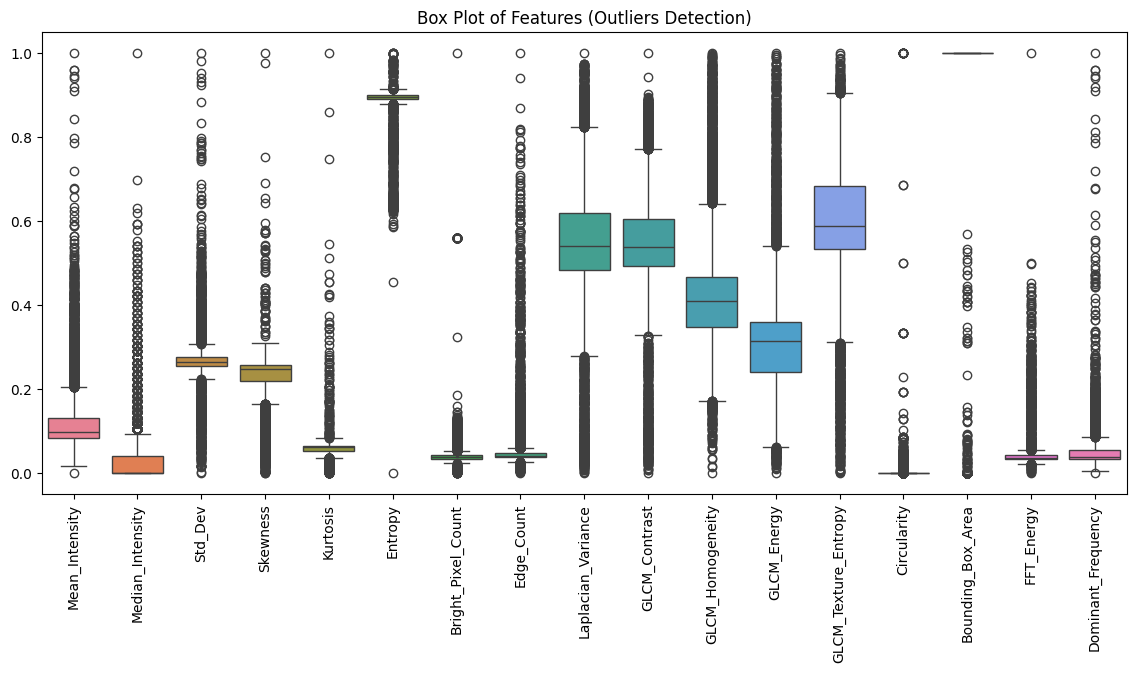

In [8]:
# Box Plot for Outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)
plt.title("Box Plot of Features (Outliers Detection)")
plt.show()

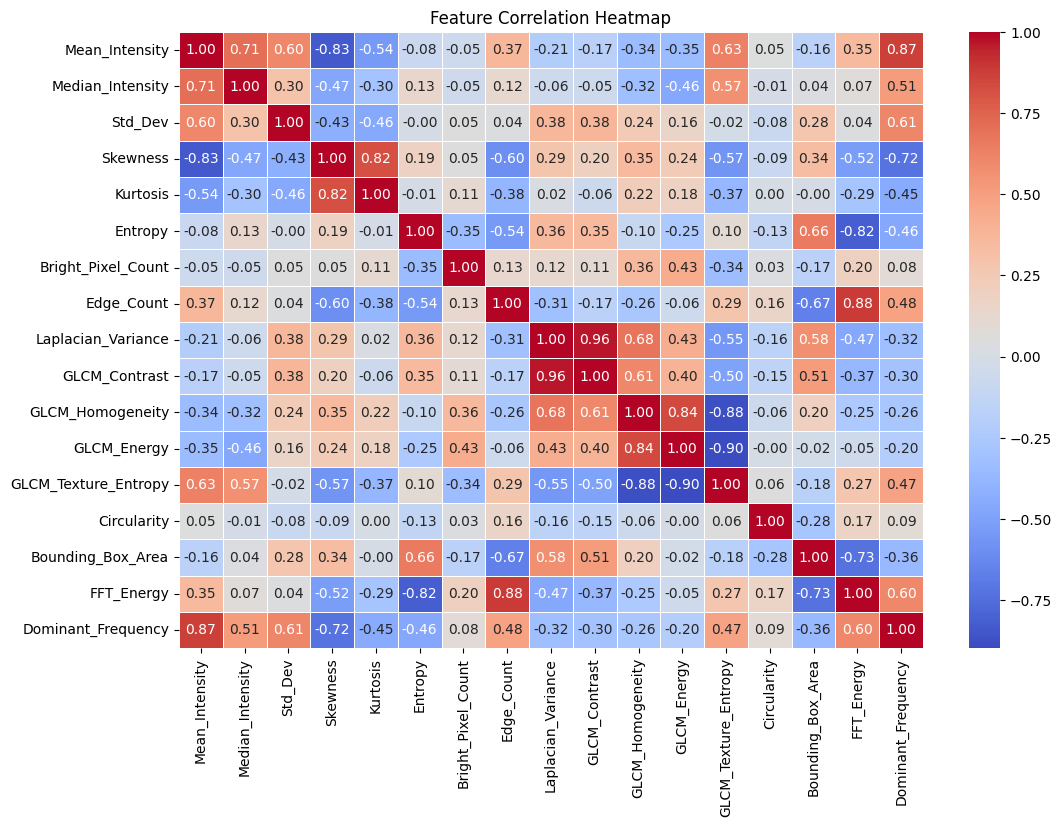

In [10]:
# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

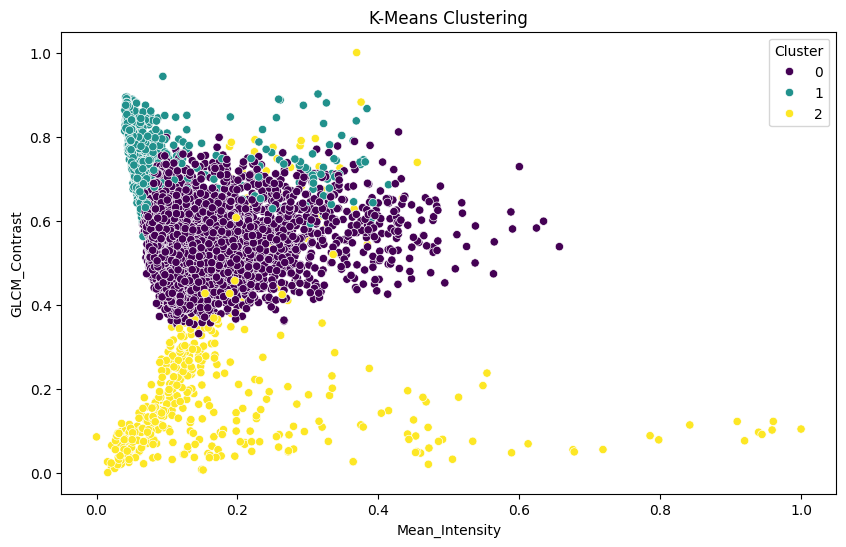

In [12]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_numeric)

# Scatter plot for clustering (Using two principal features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Mean_Intensity"], y=df["GLCM_Contrast"], hue=df["Cluster"], palette="viridis")
plt.title("K-Means Clustering")
plt.legend(title="Cluster")
plt.show()

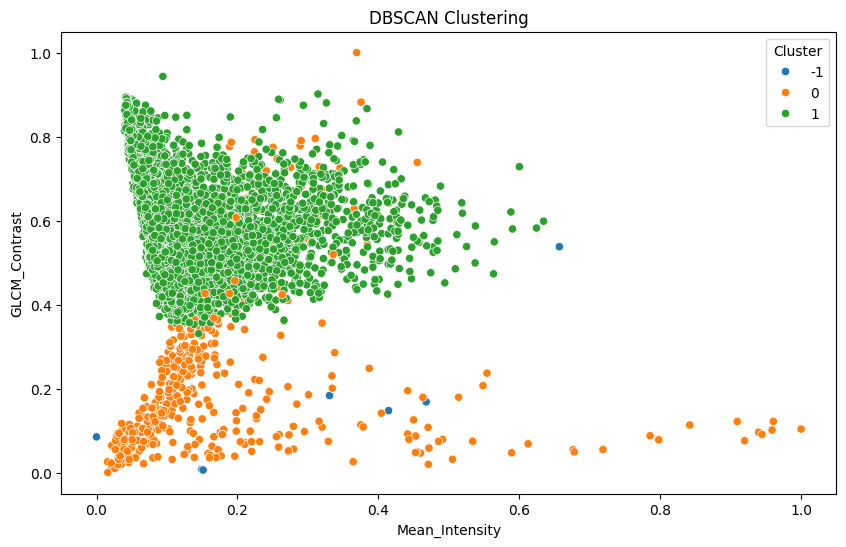

In [14]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_numeric)

# Scatter plot for DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Mean_Intensity"], y=df["GLCM_Contrast"], hue=df["DBSCAN_Cluster"], palette="tab10")
plt.title("DBSCAN Clustering")
plt.legend(title="Cluster")
plt.show()

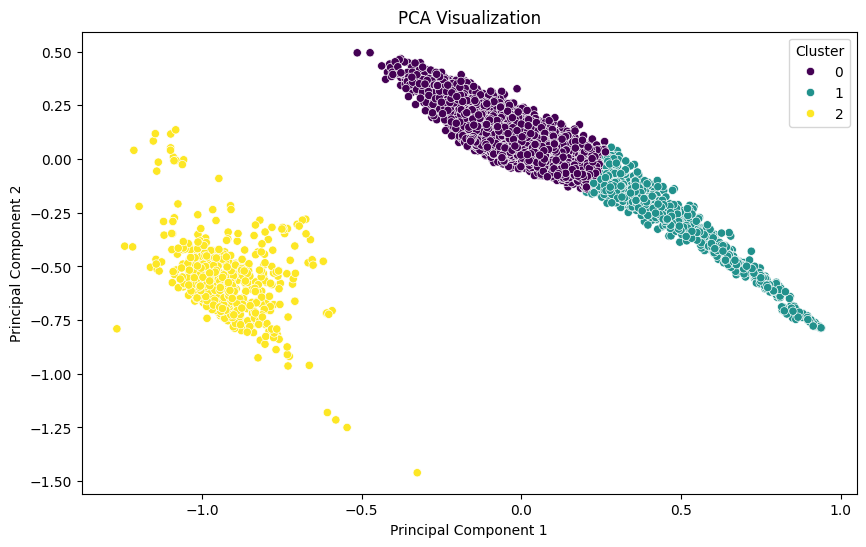

In [17]:
# Apply PCA (2 components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_numeric)

# Scatter plot for PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df["Cluster"], palette="viridis")
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


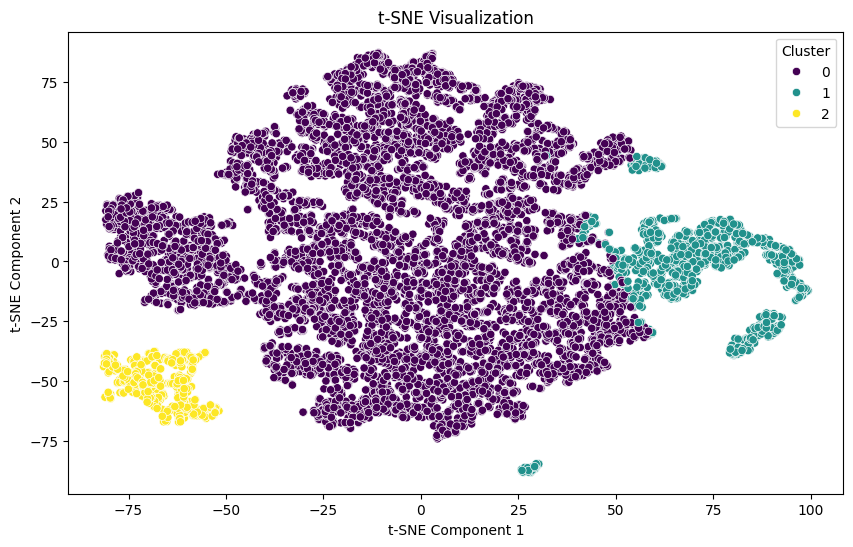

In [18]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(df_numeric)

# Scatter plot for t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df["Cluster"], palette="viridis")
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()